# Employee turnover

**Andrés Jahr**

## Librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 10)

## Datos

### Importación de la data

In [2]:
turnover_df = pd.read_csv('turnover.csv')

#se renombra la columna event por turnover (nuestro target)
turnover_df = turnover_df.rename(columns={'event': 'turnover'})
turnover_df

,stag,turnover,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1125,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1126,118.800821,0,f,34.0,Telecom,Accounting,KA,no,f,white,bus,4.6,5.5,7.2,6.3,3.7
1127,49.412731,0,f,51.0,Consult,HR,empjs,no,m,grey,bus,3.8,7.6,5.7,6.3,5.2


### Verificación de datos nulos

Se verifica que no existan datos nulos en el archivo:

In [3]:
# esto verifica si existen NaN en el archivo
turnover_df.isnull().values.any()

False

El resultado muestra que no existen datos nulos.

### Tipos de Variables

Se presentan:
    
8 variables categóricas: gender, industry, profession, traffic, coach, head_gender, greywage, way.

8 variables numéricas: stag, turnover, age, extraversion, independ, selfcontrol, anxiety, novator.

### Exploración de los datos

#### Exploración variables categóricas

Primero veremos la cantidad de opciones de cada variable categórica y la opción con mayor frecuencia (top) con su frecuencia respectiva.

In [4]:
def variable_qty(variable_name, dataframe):
    
    new_df = pd.DataFrame(dataframe.groupby(variable_name).size().sort_values(ascending=False))
    new_df.columns = ['quantity']
    new_df['percentage'] = round(new_df['quantity']*100/len(dataframe),2)
    return new_df
    

In [5]:
def variable_barplot(variable_name, dataframe):
    
    ax = sns.barplot(data=dataframe,
                x=variable_name,
                y='quantity')
    
    ax.set_title(f'Cantidad por opciones de la variable {variable_name}', fontsize=18)
    ax.set_xlabel(variable_name)
    ax.set_ylabel("Cantidad")
    names = dataframe[variable_name]
    
    if len(names) > 10:
        ax.set_xticklabels(names, rotation = 90)

    for index, row in dataframe.iterrows():
        ax.text(row.name, row.quantity + 5, format(row.quantity, ",").replace(',',"."), ha="center", #rotation='vertical',
       va='baseline', size='small', color='black', weight='normal')
    plt.show()

##### Gender

In [6]:
gender_df = variable_qty('gender', turnover_df)
gender_df

,quantity,percentage
gender,,
f,853,75.55
m,276,24.45


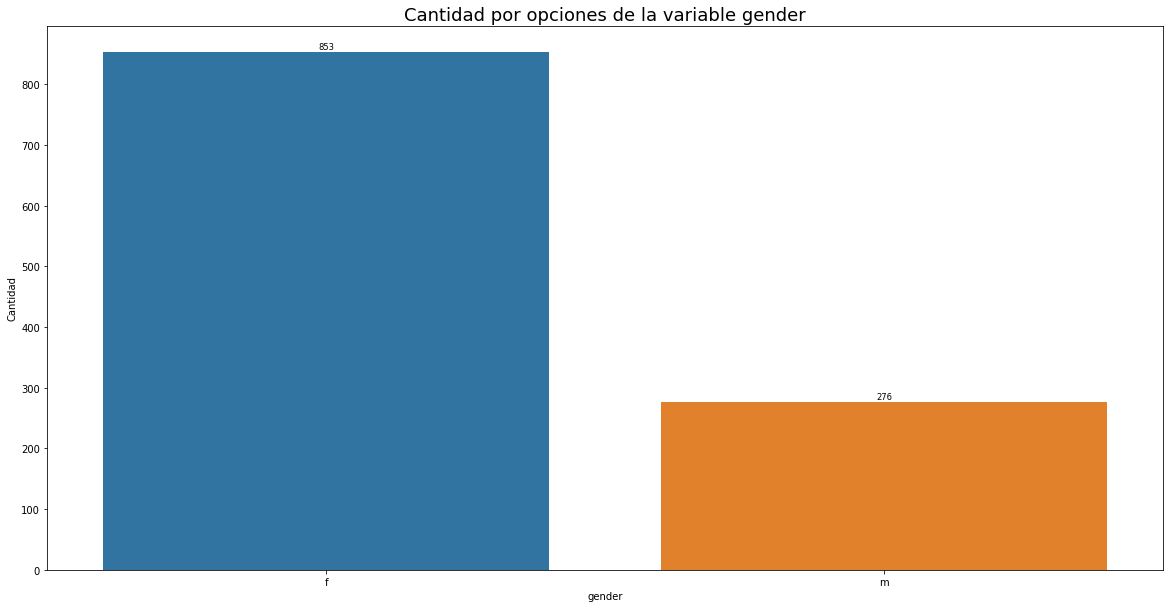

In [7]:
gender_df = gender_df.reset_index(drop=False)
variable_barplot('gender', gender_df)

Se puede ver que los datos de `gender` vienen principalmente del sexo femenino, siendo este un 75.55% del total de la base de datos disponible para hacer el modelo predictivo.

##### Industry

In [8]:
industry_df = variable_qty('industry', turnover_df)
industry_df

,quantity,percentage
industry,,
Retail,289,25.60
manufacture,145,12.84
IT,122,10.81
Banks,114,10.10
etc,94,8.33
Consult,74,6.55
State,55,4.87
Building,41,3.63
PowerGeneration,38,3.37


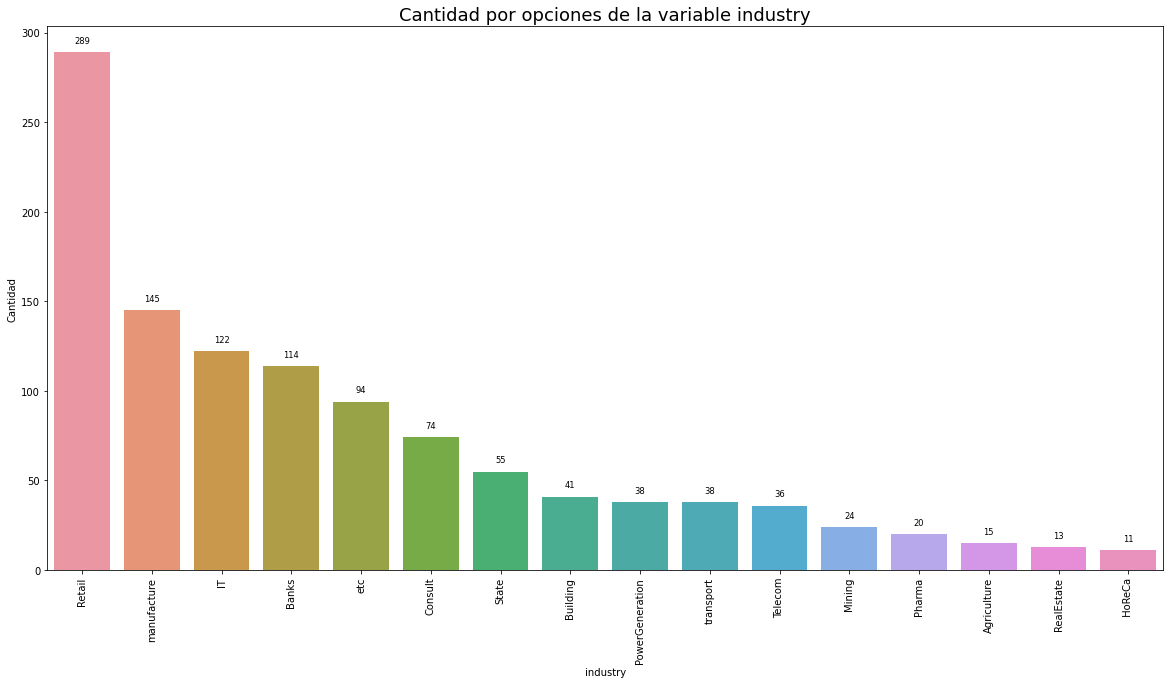

In [9]:
industry_df = industry_df.reset_index(drop=False)
variable_barplot('industry', industry_df)

En la variable `industry`, se puede ver que respustas de Retail representan un 25.6% de los datos, mientras que otras como Pharma, Agriculture, RealState y HoReCa constituye cada una menos del 2%.

##### Profession

In [10]:
profession_df = variable_qty('profession', turnover_df)
profession_df

,quantity,percentage
profession,,
HR,757,67.05
IT,74,6.55
Sales,66,5.85
etc,37,3.28
Marketing,31,2.75
BusinessDevelopment,27,2.39
Consult,25,2.21
Commercial,23,2.04
manage,22,1.95


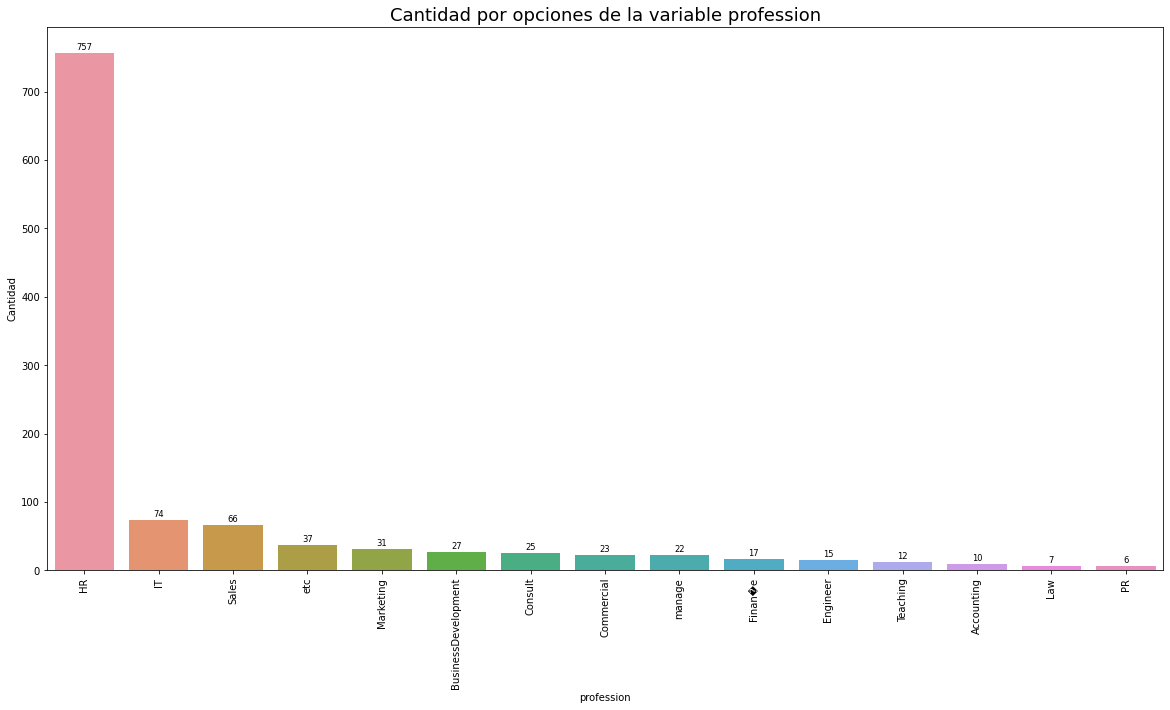

In [11]:
profession_df = profession_df.reset_index(drop=False)
variable_barplot('profession', profession_df)

En `profession`, HR constituye un 67.05% de las filas, seguido por IT con un 6.55%. Profesiones como Accounting, Law y Pr representan menos del 1% de los datos (cada una).

##### Traffic

In [12]:
traffic_df = variable_qty('traffic', turnover_df)
traffic_df

,quantity,percentage
traffic,,
youjs,318,28.17
empjs,248,21.97
rabrecNErab,211,18.69
friends,118,10.45
referal,95,8.41
KA,67,5.93
recNErab,39,3.45
advert,33,2.92


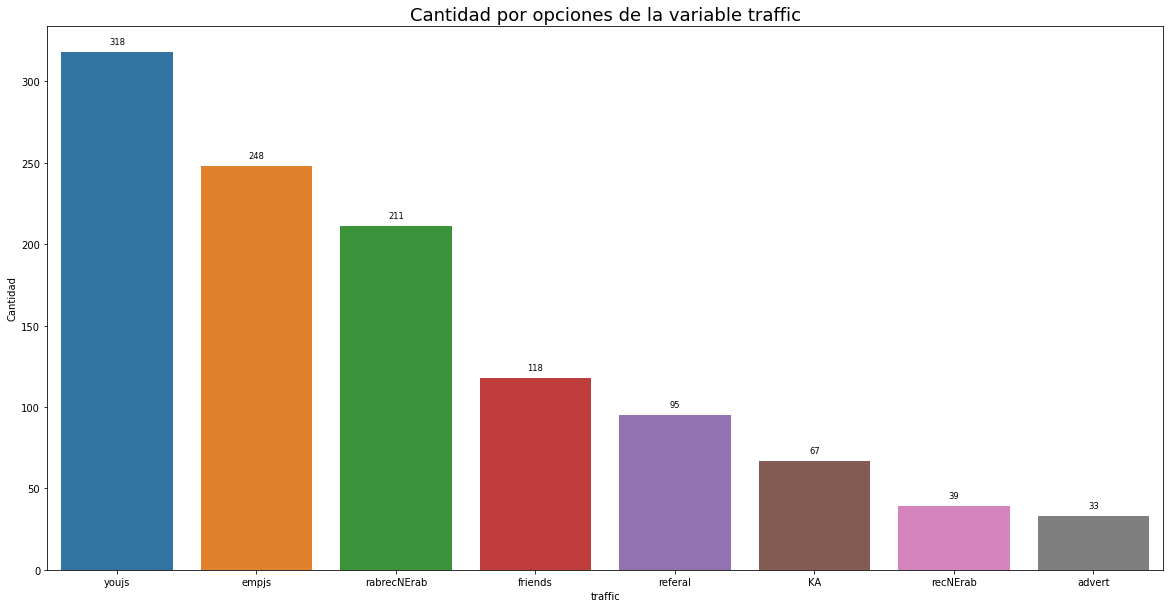

In [13]:
traffic_df = traffic_df.reset_index(drop=False)
variable_barplot('traffic', traffic_df)

En la variable `traffic`, youjs tiene el 28.17% de los datos, en contraste a advert que tiene solo el 2.92.

##### Coach

In [14]:
coach_df = variable_qty('coach', turnover_df)
coach_df

,quantity,percentage
coach,,
no,683,60.50
my head,314,27.81
yes,132,11.69


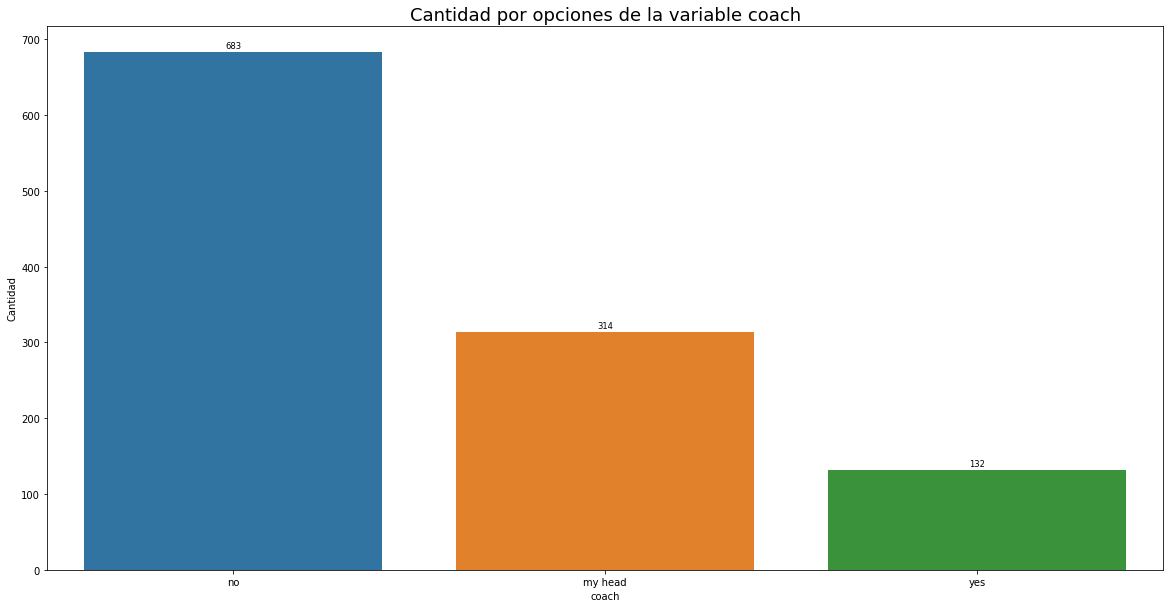

In [15]:
coach_df = coach_df.reset_index(drop=False)
variable_barplot('coach', coach_df)

En la variable `coach`, la respuesta no constituye un 60.5% de las respuestas, mientras que la respuesta yes un 11.69%.

##### Head Gender

In [16]:
head_gender_df = variable_qty('head_gender', turnover_df)
head_gender_df

,quantity,percentage
head_gender,,
m,584,51.73
f,545,48.27


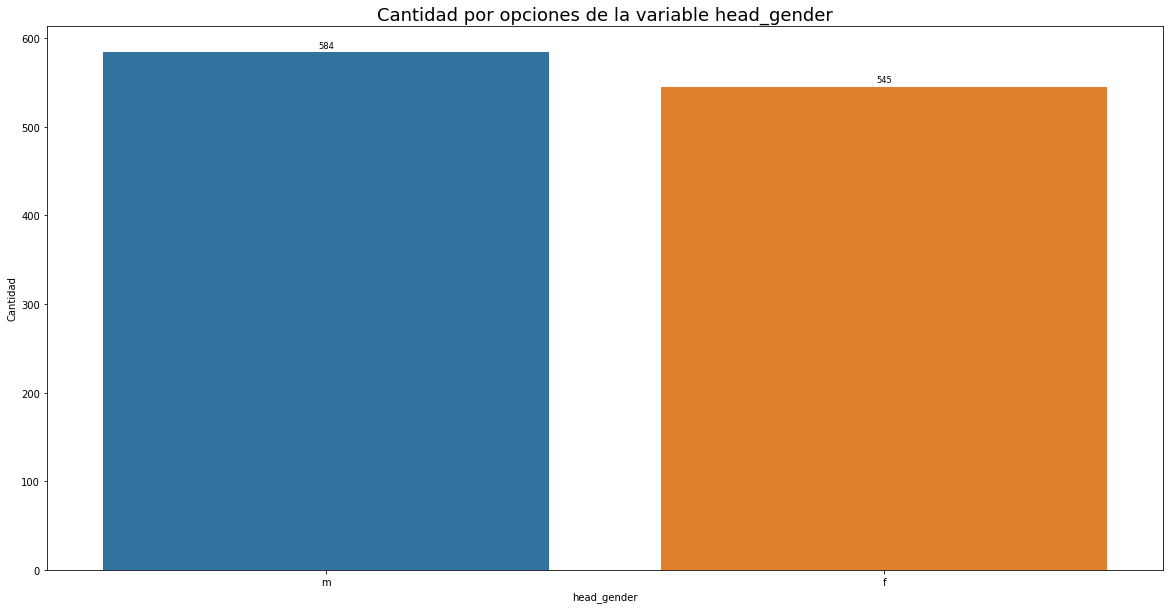

In [17]:
head_gender_df = head_gender_df.reset_index(drop=False)
variable_barplot('head_gender', head_gender_df)

La variable `head_gender` tiene una distribución más equitativa en sus respuestas. Sexo másculino representa un 51.73% de la base de datos, mientras que sexo femenino un 48.27%.

##### Greywage

In [18]:
greywage_df = variable_qty('greywage', turnover_df)
greywage_df

,quantity,percentage
greywage,,
white,1002,88.75
grey,127,11.25


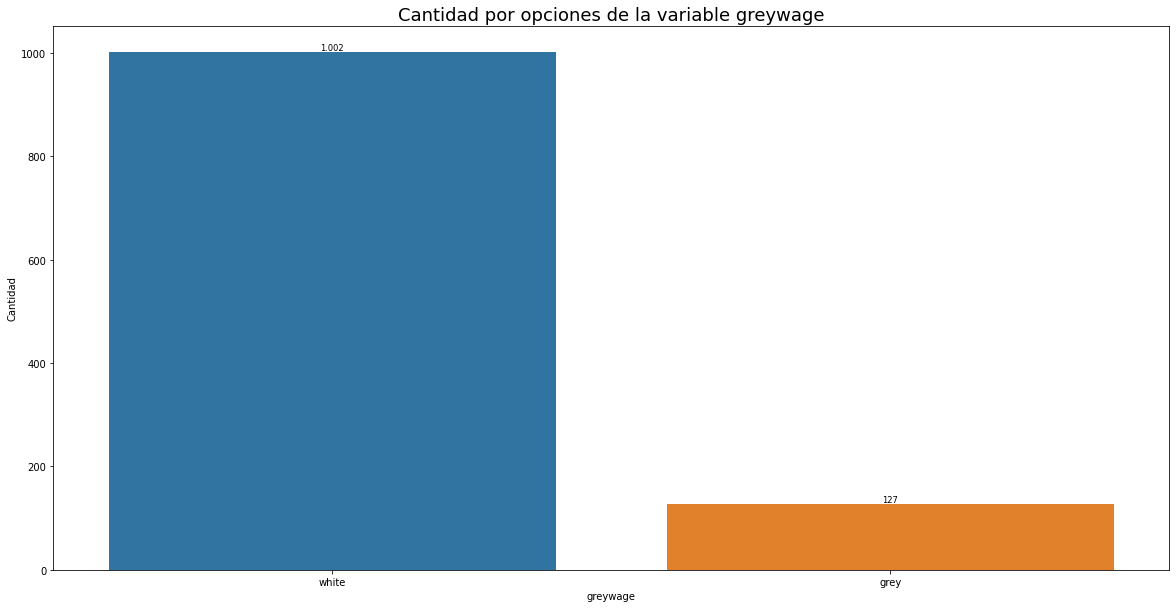

In [19]:
greywage_df = greywage_df.reset_index(drop=False)
variable_barplot('greywage', greywage_df)

La variable `greywage` presenta una diferencia significativa en sus respuestas. La opción white tiene un 88.75% de las respuestas, mientras que la opción grey un 11.25%.

##### Way

In [20]:
way_df = variable_qty('way', turnover_df)
way_df

,quantity,percentage
way,,
bus,681,60.32
car,331,29.32
foot,117,10.36


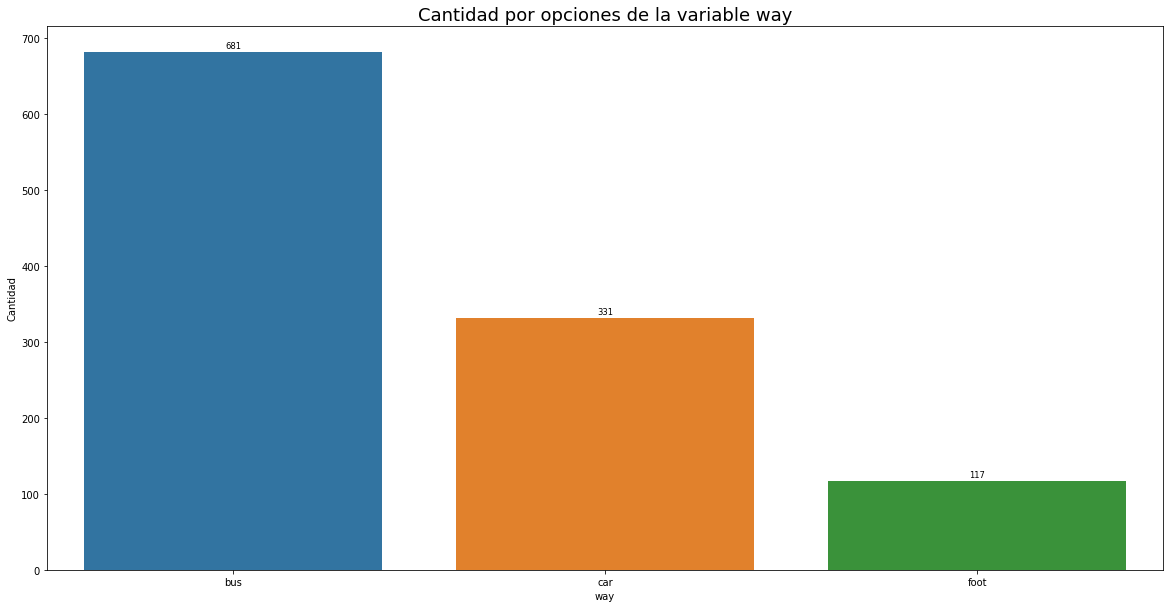

In [21]:
way_df = way_df.reset_index(drop=False)
variable_barplot('way', way_df)

En la variable `way`, se puede ver que la respuest bus constituye un 60.32% de los datos, mientras que foot un 10.36%.

#### Insights de las variables categóricas

- Hay variables en donde ciertas opciones tienen un porcentaje muy bajo de respuestas, por ejemplo, industry o profession, tienen alternativas con menos de 20 datos. El riesgo de esto es que la muestra no es representativa para esos casos, por lo que se podría llegar a tener un overfitting con esas opciones. Siguiendo con el mismo ejemplo, si en profession PR, las 6 respuestas que se tienen tuvieron rotación, se le está entregando al modelo un caso en que el 100% de las situaciones de esta profesión tienen rotación (cuando probablemente no es así), pudiendolo llevar a una conclusión erronea o sesgada.


- Hay variables que tienen diferencias significativas entre la cantidad de respuestas de sus opciones. Esto se puede ver en la mayoría de las variables, a excepción de head_gender, pero donde destacan principalmente greywage, profession, industry y gender. Esto también puede llevar a otro sesgo. Por ejemplo, si la base de datos con que alimentamos el modelo proviene de un 67.5% de personas de rercursos humanos, quiere decir que en su mayoría los datos provendran de esta profesión, la cual puede tener un comportamiento muy distinto a otras opciones (afectando al resto de las variables).

#### Exploración variables numéricas

Primero veremos la distribución de los datos numéricos. Esto nos puede dar una idea de la distrubición de los datos, sus cuartiles, media, min, max y desviación estándar.

In [22]:
turnover_df.describe()

,stag,turnover,age,extraversion,independ,selfcontrol,anxiety,novator
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,36.627526,0.505757,31.066965,5.592383,5.478034,5.597254,5.665633,5.879628
std,34.096597,0.500188,6.996147,1.851637,1.703312,1.980101,1.709176,1.904016
min,0.394251,0.000000,18.000000,1.000000,1.000000,1.000000,1.700000,1.000000
25%,11.728953,0.000000,26.000000,4.600000,4.100000,4.100000,4.800000,4.400000
50%,24.344969,1.000000,30.000000,5.400000,5.500000,5.700000,5.600000,6.000000
75%,51.318275,1.000000,36.000000,7.000000,6.900000,7.200000,7.100000,7.500000
max,179.449692,1.000000,58.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Luego podemos ver un histograma de cada uno para ver la distribución de los datos.

In [23]:
from scipy import stats

def histogram_plot(variable_name, dataframe):
    
    #plt.figure(figsize = (10,5))  #puede volver
    shapiro = stats.shapiro(dataframe[variable_name])
    shapiro_pvalue = shapiro.pvalue
    print(f'p value de Shapiro-Wilk Test {str(shapiro_pvalue)}')
    print()
    if variable_name == 'turnover':
        
        plt.xticks([0,1])
        
    plt.hist(dataframe[variable_name],edgecolor='black', linewidth=1.2)
    

##### Stag

p value de Shapiro-Wilk Test 1.2196403938157238e-31



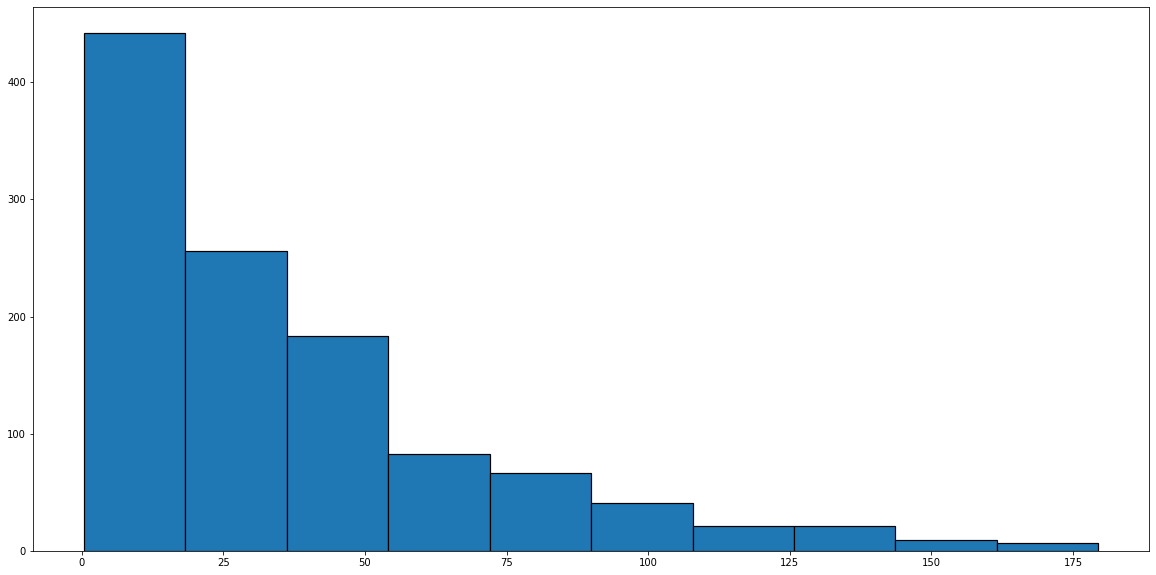

In [24]:
histogram_plot('stag', turnover_df)

Gran cantidad de los datos de la variable `stag`corresponde a personas con poca experiencia. Se puede ver que a medida que más experiencia hay, menos datos hay de esas personas.

Por Shapiro-Wilk Test no hay normalidad en los datos.

##### Turnover

p value de Shapiro-Wilk Test 1.2751816025355835e-43



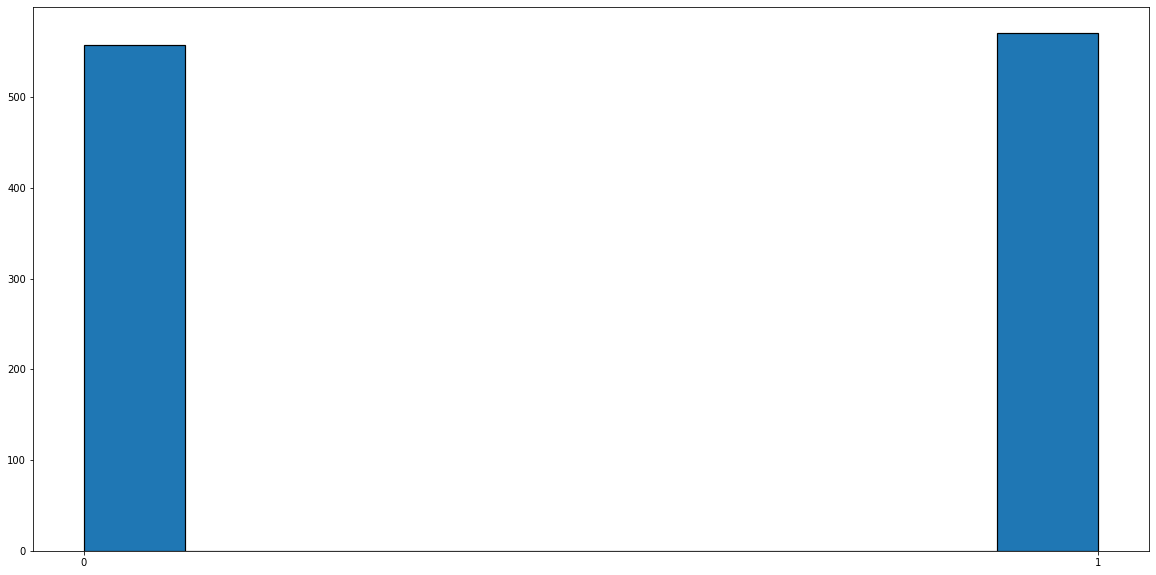

In [25]:
histogram_plot('turnover', turnover_df)

Se ve que en `turnover`, variable binaria, los datos correspondendientes a 0 y 1 tienen cantidades parecidas en sus respuestas.

Por construcción no distribuye normal.

##### Age

p value de Shapiro-Wilk Test 1.1718960229103342e-16



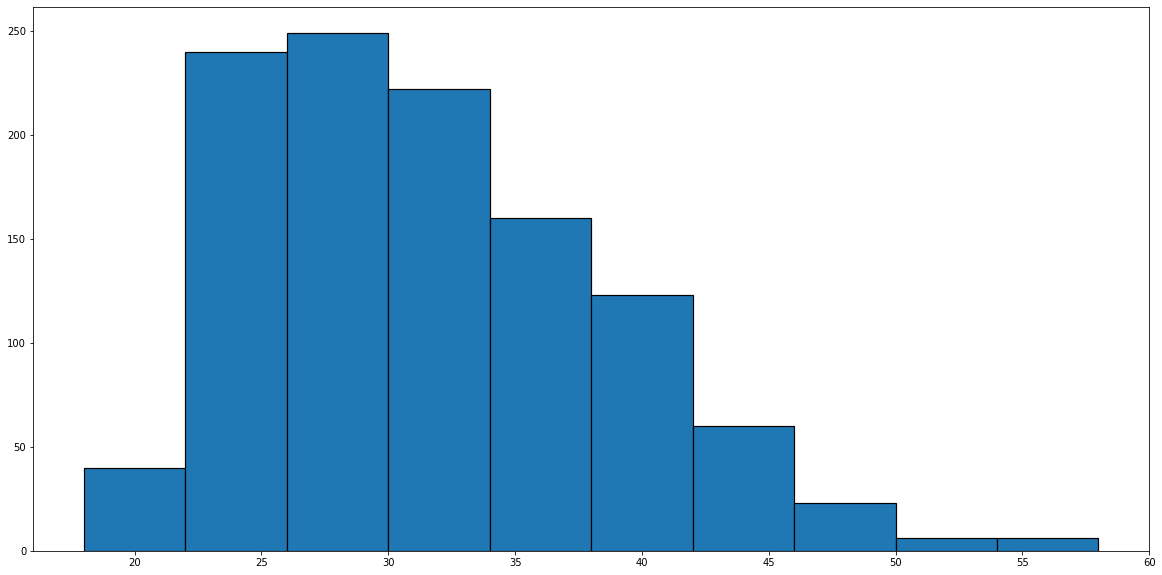

In [26]:
histogram_plot('age', turnover_df)

Personas entre los 25 y 35 años concentran la mayor parte de las respuestas en `age`.

La variable no distribuye normal.

##### Extraversion

p value de Shapiro-Wilk Test 2.7393767809691383e-11



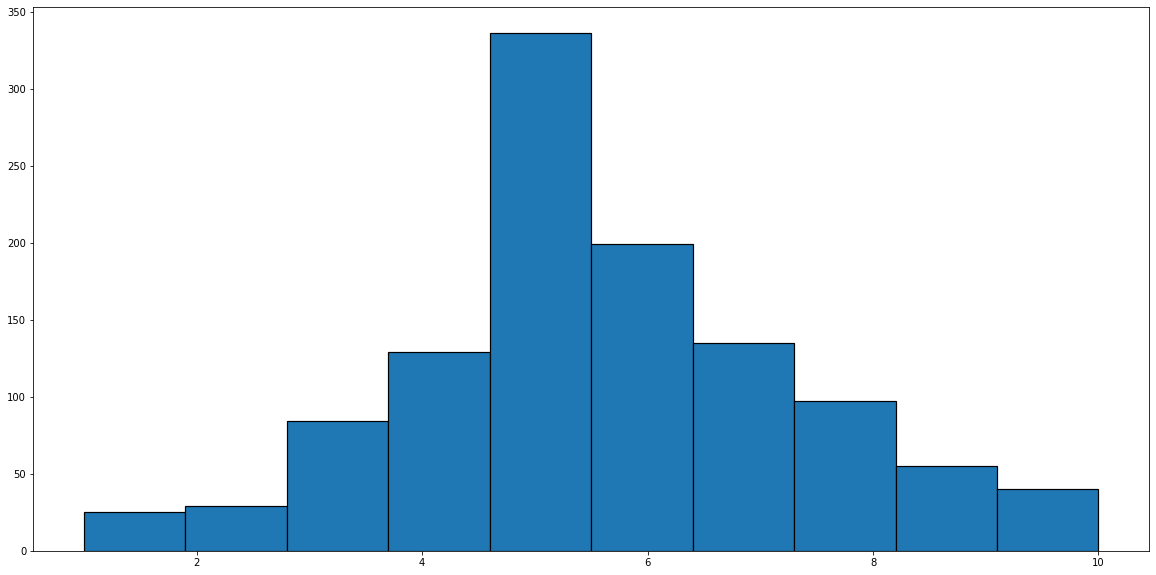

In [27]:
histogram_plot('extraversion', turnover_df)

La gran mayoría de los datos provienen de personas que se identificaron con una nota de 5 aproximadamente en `extraversion`.

La variable no distribuye normal.

##### Independ

p value de Shapiro-Wilk Test 2.2106083630291096e-10



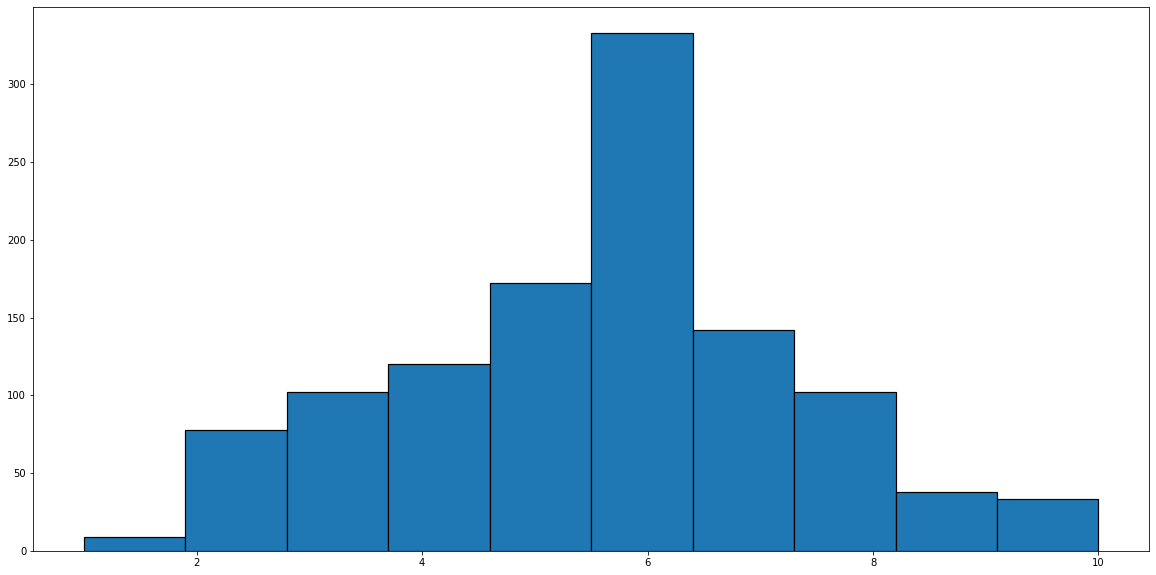

In [28]:
histogram_plot('independ', turnover_df)

La gran mayoría de los datos provienen de personas que se identificaron con una nota de 6 aproximadamente en `independ`.

La variable no distribuye normal.

##### Self Control

p value de Shapiro-Wilk Test 9.322951265156032e-12



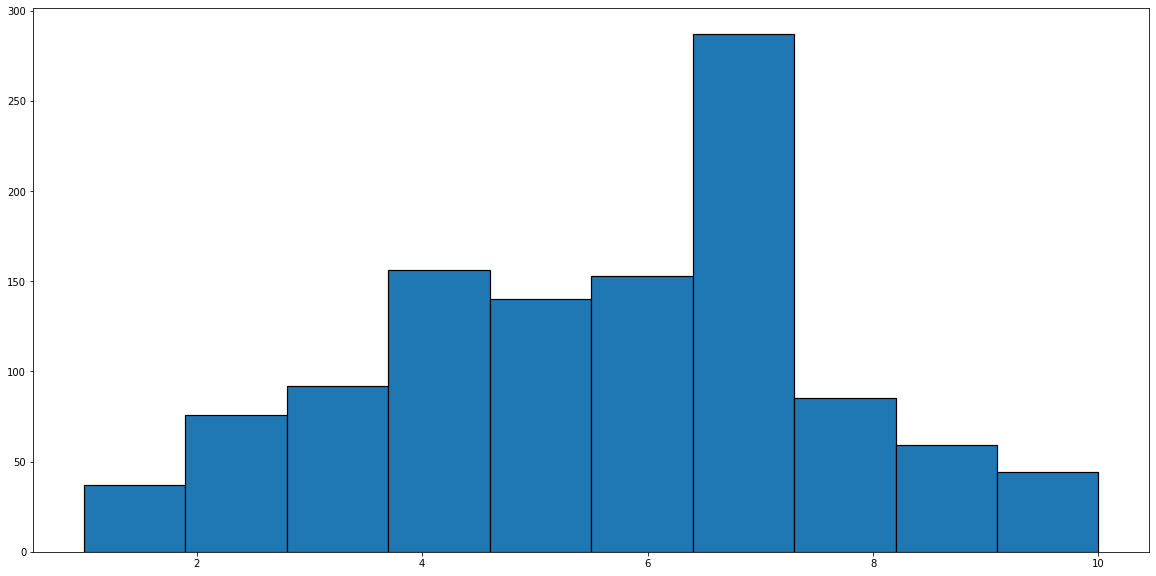

In [29]:
histogram_plot('selfcontrol', turnover_df)

La gran mayoría de los datos provienen de personas que se identificaron con una nota de 7 aproximadamente en `selfcontrol`.

La variable no distribuye normal.

##### Anxiety

p value de Shapiro-Wilk Test 8.496156794594867e-13



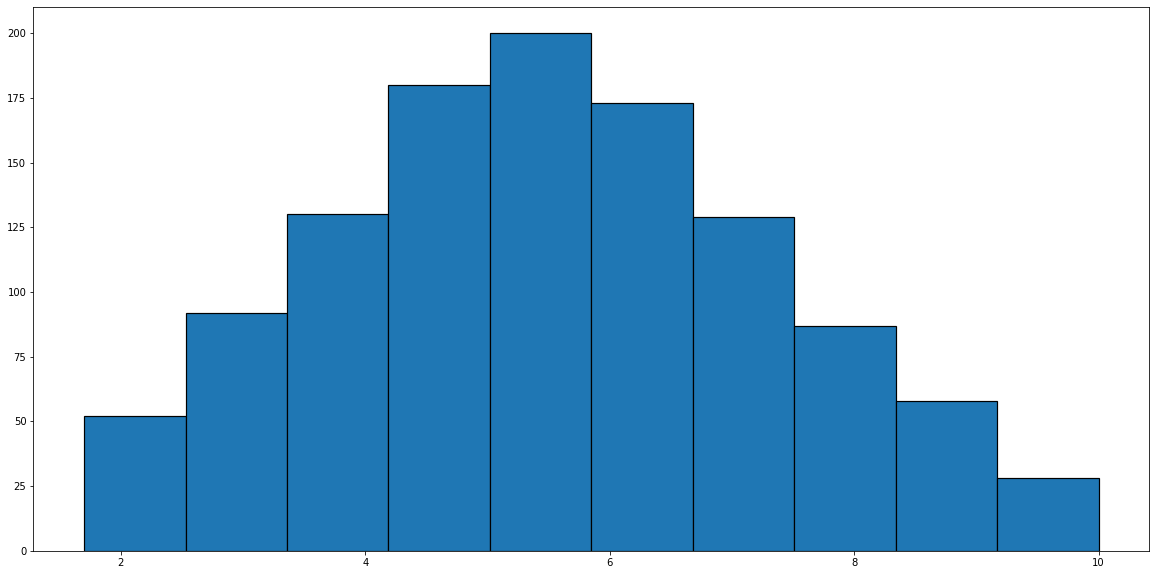

In [30]:
histogram_plot('anxiety', turnover_df)

La gran mayoría de los datos provienen de personas que se identificaron con una nota entre 4 y 6 en `anxiety`.

La variable no distribuye normal.

##### Novator

p value de Shapiro-Wilk Test 8.430310486154391e-13



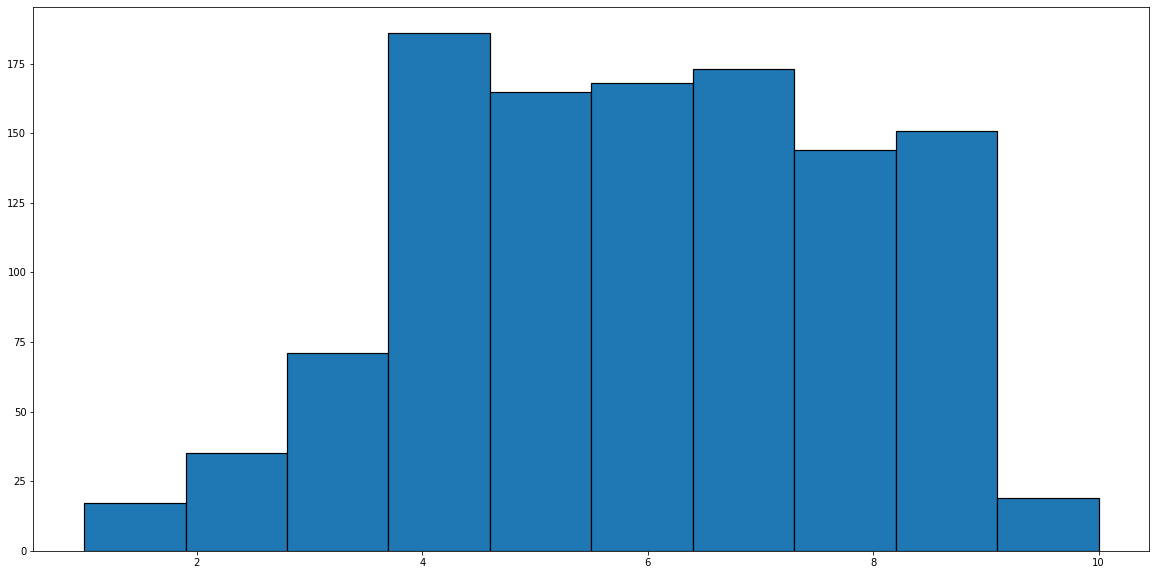

In [31]:
histogram_plot('novator', turnover_df)

En `novator`, la distribución fue más equitativa, presentandose gran parte de los datos entre 4 y 9.

La variable no distribuye normal.

Ahora veremos la correlación entre variables numéricas. Utilizaremos el método spearman debido a que las distribuciones no son normales.

In [32]:
turnover_df.corr(method='spearman')

,stag,turnover,age,extraversion,independ,selfcontrol,anxiety,novator
stag,1.000000,-0.038309,-0.166836,-0.082854,-0.001962,0.077262,0.016552,-0.042828
turnover,-0.038309,1.000000,-0.057943,0.014843,0.041005,-0.038569,-0.068698,0.002491
age,-0.166836,-0.057943,1.000000,-0.121954,0.029770,0.017715,0.055624,0.047673
extraversion,-0.082854,0.014843,-0.121954,1.000000,-0.192088,-0.527630,-0.127174,0.289064
independ,-0.001962,0.041005,0.029770,-0.192088,1.000000,-0.152501,-0.434142,0.015855
selfcontrol,0.077262,-0.038569,0.017715,-0.527630,-0.152501,1.000000,-0.096150,-0.570410
anxiety,0.016552,-0.068698,0.055624,-0.127174,-0.434142,-0.096150,1.000000,0.253491
novator,-0.042828,0.002491,0.047673,0.289064,0.015855,-0.570410,0.253491,1.000000


En su mayoría hay bajas correlaciones entre las variables. Las que destacan son: 

- selfcontrol-novator con -0.570
- selfcontrol-extraversion con -0.527
- anxiety-independ con -0.434
- novator-extraversion con 0.289
- novator-anxiety 0.253.


Sobretodo selfcontrol tiene altas correlaciones con otras variables (novator y extraversion) lo que hay que considerar para el modelo ya que buscamos utilizar variables que se relacionen con turnover pero no tanto entre ellas.

### Hipótesis

1. Habrá una relación significativa entre las variables gender, industry, profession, coach, stag, age, independ, anxiety y turnover. Significativa será, en el caso de las variable categóricas, cuando existan diferencias considerables en la media de turnover entre las opciones.
2. No habrá una relación significativa entre las variables traffic, head_gender, greywage, way, extraversion, novator y turnover.

### Relación entre variables

#### Variables categóricas y turnover

Se define una función `groupby_variable` para las variables categóricas, la cual retorna un dataframe con la media de turnover en cada una de sus posibles alternativas.

In [33]:
def groupby_turnover(col):
    
    return turnover_df[[col, 'turnover']].groupby([col], as_index=False).mean().sort_values('turnover', ascending=False)

Luego se analiza cada relación entre las variables categóricas y turnover:

##### Gender

In [34]:
groupby_turnover('gender')

,gender,turnover
0,f,0.511137
1,m,0.489130


No se evidencia una diferencia significativa entre la rotación de hombres (0.51) y mujeres (0.48), por lo que se rechaza la hipótesis propuesta de que si lo sería.

##### Industry

In [35]:
groupby_turnover('industry')

,industry,turnover
3,Building,0.756098
1,Agriculture,0.666667
2,Banks,0.657895
11,State,0.636364
4,Consult,0.608108
6,Mining,0.583333
13,etc,0.574468
7,Pharma,0.550000
0,HoReCa,0.545455
14,manufacture,0.482759


En industry hay algunos valores similares, pero hay diferencias significativas, por ejemplo, entre Building y IT. Se acepta la hipótesis de que la relación con rotación si es significativa. 

##### Profession

In [36]:
groupby_turnover('profession')

,profession,turnover
12,Teaching,1.000000
10,PR,0.833333
4,Engineer,0.733333
8,Law,0.714286
5,Finan�e,0.705882
14,manage,0.681818
9,Marketing,0.677419
2,Commercial,0.652174
3,Consult,0.640000
0,Accounting,0.600000


Hay varios valores distintos dependiendo de la profesión, por lo que se acepta la hipótesis de que la relación con turnover es significativa.

##### TraffIc

In [37]:
groupby_turnover('traffic')

,traffic,turnover
6,referal,0.663158
4,rabrecNErab,0.601896
0,KA,0.537313
2,empjs,0.524194
5,recNErab,0.487179
7,youjs,0.443396
1,advert,0.393939
3,friends,0.355932


Hay diferencias considerables en ciertos valores, por lo que se rechaza la hipótesis de que la relación con turnover no sería significativa.

##### Coach

In [38]:
groupby_turnover('coach')

,coach,turnover
2,yes,0.568182
1,no,0.513909
0,my head,0.461783


No hay una diferencia considerable entre las opciones de coach, por lo que se rechaza la hipótesis de que su relación con turnover s significatibva.

##### Head Gender

In [39]:
groupby_turnover('head_gender')

,head_gender,turnover
1,m,0.525685
0,f,0.484404


Los valores son muy similares entre la cantidad media de turnovers con head gender femeninos y masculinos. Se acepta la hipótesis de que la relación con turnover no sería sifnificativa.

##### Greywage

In [40]:
groupby_turnover('greywage')

,greywage,turnover
0,grey,0.574803
1,white,0.497006


Los valores entre grey y white son bastantes similares respecto a turnover, se acepta la hipótesis de que la variable no tiene una relación significativa con la rotación.

##### Way

In [41]:
groupby_turnover('way')

,way,turnover
1,car,0.525680
0,bus,0.519824
2,foot,0.367521


Si bien casi no hay diferencia entre car y bus, si hay una diferencia más importante con foot, por lo que se rechaza la hipótesis de que no hay una relación significativa con turnover. 

#### Variables numéricas y turnover

Para las variables numéricas se puede utilizar un ratio entre la cantidad de turnover y la cantidad de casos totales de la catergoría de la variable. Con esto se puede obtener una tasa de casos de rotación por cada alternativa de la variable. Esto se puede graficar en una regresión lineal (con su error), y ver si existe una correlación significativa entre ambas variables. 

In [42]:
def turnover_lineal_regression(variable_name, dataframe):
    turnover_variable_df = pd.DataFrame(dataframe[['turnover', variable_name]].groupby(variable_name).sum())
    turnover_variable_df['total_turnover'] = pd.DataFrame(dataframe[['turnover', variable_name]].groupby(variable_name).size())
    turnover_variable_df['turnover_rate'] = turnover_variable_df['turnover']/turnover_variable_df['total_turnover']
    turnover_variable_df = turnover_variable_df.reset_index(drop=False)
    print('Correlación: ' + str(turnover_variable_df[variable_name].corr(turnover_variable_df['turnover_rate'], method='spearman')))
    sns.lmplot(variable_name, 'turnover_rate',data=turnover_variable_df)


##### Extraversion

Correlación: 0.1568089516460079


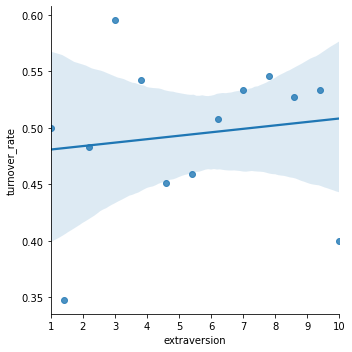

In [43]:
turnover_lineal_regression('extraversion', turnover_df)

Extraversion tiene una baja correlación con turnover, se puede ver en su valor y en su regresión lineal, donde el error es alto entre cada cada opción. No se incluirá en el modelo.

##### Independ

Correlación: 0.7882040680887783


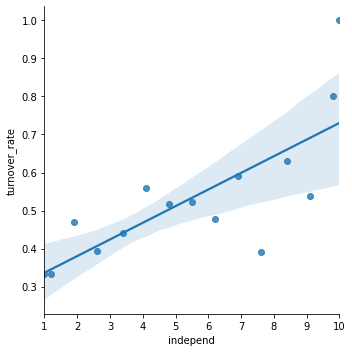

In [44]:
turnover_lineal_regression('independ', turnover_df)

Independ tiene una alta correlación con turnover (0.788). Su gráfica muestra un error menor. Se incluirá en el modelo.

##### Self Control

Correlación: -0.39889996471352884


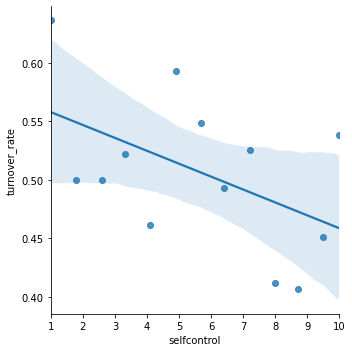

In [45]:
turnover_lineal_regression('selfcontrol', turnover_df)

Self control tiene una correlación negativa media-alta. Tiene más error en sus valores. Se podría eliminar del modelo por su correlacion con novator de -0.570. No se hará en este caso por no ser una correlación extremadamente alta y ser un modelo con pocas variables.

##### Anxiety

Correlación: -0.5639238070123688


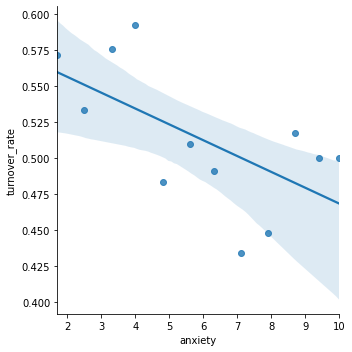

In [46]:
turnover_lineal_regression('anxiety', turnover_df)

Anxiety también tiene una correlación negativa con turnover. Esta es más alta que selfcontrol. Se incluirá la variable en el modelo.

##### Novator

Correlación: 0.49890109890109896


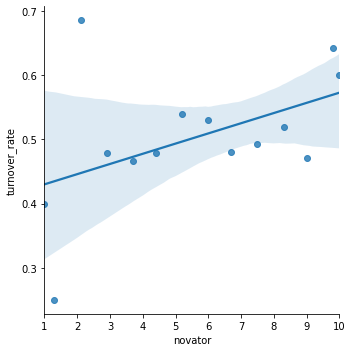

In [47]:
turnover_lineal_regression('novator', turnover_df)

Novator tiene una correlación positiva con turnover. Si bien tiene un poco más de error en sus valores más bajos, en los valores más altos tiende a bajar esa desviación. Dada su correlación se incluirá en el modelo.

##### Age

Correlación: -0.18125666405103952


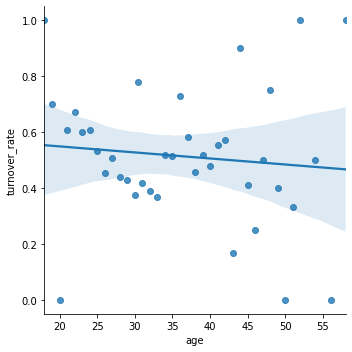

In [48]:
turnover_lineal_regression('age', turnover_df)

Age no tiene una alta correlación con turnover. Su correlación es negativa, media-baja y con valores muy dispersos. No se incluirá en el modelo.

##### Stag

Correlación: -0.058481223630225725


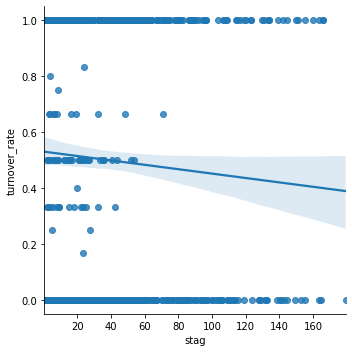

In [49]:
turnover_lineal_regression('stag', turnover_df)

Stag tiene un correlación muy baja con turnover. Este valor viene del hecho de que stag es una variable continua con muchos valores únicos, lo que hace ver una variedad grandes de puntos en el gráfico. Una opción para hacerlo más legible y con una posible mayor relación es discretizar sus valores, por ejemplo, rangos 0-10, 10-20, 20-30, etc. Por ahora, la variable no se considerará en el modelo-

### Conclusión Variables

Considerando sólo las relaciones con turnover, las variables que quedarían para el modelo serían: industry, profession, traffic, way, independ, selfcontrol, anxiety y novator.

También se podría considerar el sesgo respecto a ciertas profesiones e industrias que casi no tienen datos (y eliminar estas variables), pero no se llevará a cabo en este caso, considerando que es un problema de la cantidad de datos y que podrían haber industrias o profesiones que si lleven a una mejor predicción (las que si tienen datos).

Por lo tanto el dataframe del modelo quedaría con la siguientes variables:

In [50]:
model_df = turnover_df.loc[:, ['turnover', 'industry', 'profession', 'traffic', 'way',
                        'independ', 'selfcontrol', 'anxiety', 'novator']]

Luego, para poder trabajar con el modelo se debe codificar las variables categóricas. Esto se puede hacer con técnicas como label encoding o hot encoding (variables dummies).

En este caso se hará con label enconding:

In [51]:
categorical_variables = ['industry', 'profession', 'traffic', 'way']

for var in categorical_variables:
    
    model_df.loc[:,var] = pd.factorize(model_df[var])[0].reshape(-1,1)
    
model_df

,turnover,industry,profession,traffic,way,independ,selfcontrol,anxiety,novator
0,1,0,0,0,0,4.1,5.7,7.1,8.3
1,1,0,0,1,0,4.1,5.7,7.1,8.3
2,1,1,0,0,0,6.2,2.6,4.8,8.3
3,1,1,0,0,0,7.6,4.9,2.5,6.7
4,1,2,1,2,0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...
1124,0,0,0,0,0,3.4,2.6,4.8,8.3
1125,0,0,0,0,0,3.4,2.6,4.8,8.3
1126,0,10,14,5,0,5.5,7.2,6.3,3.7
1127,0,4,0,1,0,7.6,5.7,6.3,5.2


In [52]:
#código para hacer hot encoding

#turnover_df = pd.get_dummies(turnover_df)
#turnover_df

## Modelo

Podemos crear un modelo que permita identificar a un empleado con alto riesgo de rotación. Los pro y contras de este van a depender igualmente del modelo elegido. A grandes razgos, en los contras se ecuentra el hecho de que el input de este modelo va a requerir tener información de la persona en la empresa. Esto quiere decir que se va a tener que contratar al empleado y una vez que este este inmerso, se pueden obtener sus datos para obtener la predicción. Por ende, no se podría prevenir de antemano el abandono antes del contrato. También podemos ver problemas con la base de datos (no es directamente del modelo, más bien las condiciones actuales). La cantidad de datos no son tantos por lo que puede existir overfitting o sesgos en el modelo predictivo. Muchas variables presentan una carga en una de sus categorías, lo que quiere decir que los datos obtenidos para el entrenamiento pudieron venir de un cierto tipo de personas, lo que no necesariamente representa valores generales. En los pro encontramos que un modelo de este tipo permitiría facilmente tener una predicción de si una persona va a abandonar la compañía. Con esto se pueden tomar mejores decisiones de incentivos para mantener a los colaboradores valiosos para la empresa. 

Para hacer el modelo primero dividimos la data en set de entrenamiento y de test. Lo adecuado sería seleccionar un testeo que sea entre el 30% y el 10% del total de datos para no generar underfitting o overfitting. 

In [53]:
from sklearn.model_selection import train_test_split

def split_test(dataframe, test_size):
    
    x_train, x_test, y_train, y_test = train_test_split(dataframe, 
                                                        dataframe['turnover'],
                                                        test_size=test_size,
                                                        random_state = 42)
    x_train = x_train.drop('turnover',axis=1)
    x_test = x_test.drop('turnover',axis=1)
    
    return x_train, x_test, y_train, y_test

In [54]:
x_train, x_test, y_train, y_test = split_test(model_df, 0.2)

Probaremos con tres modelos. Las mismas librerías nos permiten ver el rendimiento que tuvo el test respecto a la predicción, es decir, en cuántos casos predijo correctamente que el individuo hizo rotación o no.

Primero probaremos con un árbol de decisión:

In [55]:
from sklearn.tree import DecisionTreeClassifier

def decision_tree(x_train, x_test, y_train, y_test):
    
    dec_tree = DecisionTreeClassifier()
    dec_tree.fit(x_train, y_train)
    
    dec_tree_score = round(dec_tree.score(x_test, y_test) * 100, 2)
    
    print(f'El rendimiento del modelo decision tree fue de: {str(dec_tree_score)}%')
    

In [56]:
decision_tree(x_train, x_test, y_train, y_test)

El rendimiento del modelo decision tree fue de: 60.18%


Este rendimiento es bajo, quiere decir que solo en el 60% de los casos la predicción fue correcta. Esto se puede deber principalmente a que hay pocos datos disponibles, por lo que el modelo no tiene el suficiente entrenamiento para poder generar predicciones correctas y puede generar underfitting. Además, como se mencionó anteriormente, hay ciertos categorías que tienen muy pocos valores por lo que podrían ajustarse de manera incorrecta ante el set de testeo. También se puede deber a que las variables no tienen una relación lo suficientemente fuerte generada con la rotación, lo que puede llevar a resultados incongruentes. Por último, podría haber un modelo que se ajuste más adecuadamente a los datos.

El segundo modelo a probar es Support Vector Classification:

In [57]:
from sklearn.svm import SVC

def svc(x_train, x_test, y_train, y_test):
    
    svc = SVC()
    svc.fit(x_train, y_train)
    
    svc_score = round(svc.score(x_test, y_test) * 100, 2)
    
    print(f'El rendimiento del modelo svc fue de: {str(svc_score)}%')
    

In [58]:
svc(x_train, x_test, y_train, y_test)

El rendimiento del modelo svc fue de: 57.08%


El rendimiento de Support Vector Classification fue aun más bajo que en Decision Tree. Esto se puede deber a las mismas razones explicadas anteriormente.

El tercer modelo es KNN:

In [59]:
from sklearn.neighbors import KNeighborsClassifier

def knn(x_train, x_test, y_train, y_test):
    
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(x_train, y_train)
    
    knn_score = round(knn.score(x_test, y_test) * 100, 2)
    
    print(f'El rendimiento del modelo knn fue de: {str(knn_score)}%')
    

In [60]:
knn(x_train, x_test, y_train, y_test)

El rendimiento del modelo knn fue de: 65.04%


Debido a las razones mencionadas anteriormente, este modelo tampoco tuvo buen rendimiento, su score se encontró entre el de Decision Tree y SVC. Lo ideal sería tener mayor cantidad de datos y luego poder ver el modelo que mejor ajusta.

### Otros Datos

Otros datos que pudieron ser valiosos para este modelo serían: salario, cantidad de horas extras trabajadas, % del salario por hora extra trabajada, nivel de satisfaccion con el trabajo, área en la que se desempeña en la empresa, nivel de estres en el trabajo, cantidad de días de vacaciones, cantidad de ascensos, distancia desde la casa al lugar de trabajo, cantidad de bonos al año, balance entre carga de trabajo y estilo de vida, estatus de relacion, cantidad de hijos, cantidad de grados y postgrados, cantidad de horas a la semana, entre otros. 

### Modelo anticipado

Se podría generar otro modelo que identique a las personas con alto riesgo de rotación antes de contratarlas. La diferencia con el modelo anterior sería que el input de variables debe ser tal que se pueda conseguir antes de realizar el trabajo. Por ejemplo, si a una persona aun no la contratan, no se podría saber su nivel de ansiedad en la empresa o la cantidad de tiempo en la empresa, ya que siempre sería 0. Hay variables que no tendría sentido incluirlas, lo que no quiere decir que no existan variables suficientes para generar la predicción. Puede que la disponibilidad de datos si sea más limitada. Aun así, se pueden conseguir datos (para generar un output) en una misma entrevista respecto a en qué medio de transporte se piensa ir al trabajo, o distancia al trabajo, edad, estatus de relación, o cosas internas que sabría la empresa como el salario que le dará a la persona, si le otorgarán un coach, etc. Respecto al entrenamiento se puede ocupar el set del modelo anterior, sin considera las variables que no pueden ser parte del input.

### Recomendaciones al cliente

Al cliente le recomendaría que recopilara una mayor cantidad de datos para poder tener un modelo más robusto. Si es que estos no están disponibles les diría que busquen en distintas industrias pero del mismo rubro que el suyo, de tal forma de obtener datos variados pero con empleados que se encuentren en condiciones similares a las que estarían en su empresa y así salir de una condición de underfitting.
Luego, respecto al modelo, le recomedaría probar con distintos evaluando sus pro y contras, buscando el que muestre mejor desempeño después de probar el set de testeo.
Respecto a el modelo que identifica a personas de alto riesgo con anterioridad al contrato, le recomendaría que buscara qué variables generan mayor relación con la rotación, que se puedan obtener al momento de una entrevista (o proceso de reclutamiento). Algunas de estas variables pueden provenir del modelo anterior, pero también pueden crear nuevas que ayuden a predecir de mejor manera la nueva persona tiene riesgo de abandonar la empresa.